<a href="https://colab.research.google.com/github/AschHarwood/social_unrest/blob/main/social_unrest_timeseries_v4_10_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs

In [ ]:
%pip install keras==2.4

     |████████████████████████████████| 170 kB 7.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [ ]:
%tensorflow_version 2.4.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.4.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
alembic                       1.4.1
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
autokeras                     1.0.16
autopage                      0.4.0
azure-core                    1.19.0
azure-storage-blob            12.9.0
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis

In [ ]:
%pip install boto3

In [ ]:
%pip install autokeras

     |████████████████████████████████| 166 kB 5.3 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
     |████████████████████████████████| 454.3 MB 19 kB/s 
     |████████████████████████████████| 462 kB 48.1 MB/s 
     |████████████████████████████████| 4.0 MB 24.9 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [ ]:
#%pip install swifter

Colab mode enabled.


In [ ]:
#%pip install gensim

In [ ]:
# %pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 7.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
# %pip install pycaret[full]

     |████████████████████████████████| 173.5 MB 24 kB/s 
     |████████████████████████████████| 54.0 MB 1.4 MB/s 
     |████████████████████████████████| 40 kB 6.7 MB/s 
     |████████████████████████████████| 308 kB 94.6 MB/s 
     |████████████████████████████████| 100 kB 13.6 MB/s 
     |████████████████████████████████| 356 kB 99.2 MB/s 
     |████████████████████████████████| 76.4 MB 45 kB/s 
     |████████████████████████████████| 356 kB 90.8 MB/s 
     |████████████████████████████████| 6.6 MB 22.0 MB/s 
     |████████████████████████████████| 124 kB 91.9 MB/s 
     |████████████████████████████████| 788 kB 60.7 MB/s 
     |████████████████████████████████| 275 kB 75.3 MB/s 
     |████████████████████████████████| 7.3 MB 49.9 MB/s 
     |████████████████████████████████| 3.6 MB 50.6 MB/s 
     |████████████████████████████████| 5.8 MB 68.6 MB/s 
     |████████████████████████████████| 756 kB 78.1 MB/s 
     |████████████████████████████████| 23.9 MB 30 kB/s 
     |████████████

## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pycaret.utils import enable_colab 
#enable_colab()
#%pip install tensorflow_hub
import tensorflow_hub as hub
import tensorflow as tf
import autokeras as ak
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
import os
import boto3
session = boto3.session.Session()
client = session.client('s3',
                        region_name='nyc3',
                        endpoint_url='https://nyc3.digitaloceanspaces.com',
                        aws_access_key_id='',
                        aws_secret_access_key='')

In [ ]:
client.download_file('politicalnews', 'political_violence/features/main_feature_sets/main_dataset_v2_9_13_21.feather', '/content/drive/MyDrive/social_unrest_data/main_data_9_13.feather')

## Reading Data

In [54]:
df = pd.read_feather('/content/social_unrest_data/main_data_9_13.feather')

In [55]:
df = df[df.fips!='nan']

## Preprocessing data

**Steps**

- fill gaps in dates on dataset (done for complete dataset, needs to be done for 
- split data into numeric, categorical, and text
- drop`ST_ABBR`, `index`

Target
- convert `protest_count` to binary

Date/categorical
- split date data in day, month, year
- `fips` to `int`
- label encode 
      'Governor Political Affiliation',
       'State Senate Majority Political Affiliation',
       'State House Majority Political Affiliation',
       'State Attorney General Political Affiliation',
       'State Insurance Commissioner Political Affiliation'

Text
- split off `reddit`, `articles`, `tweets`
- tokenize
- create word embeddings

Numeric

- convert to float


Steps

- Do datatype converstions
- create word embeddings for text
- reassemble dataset
- train_test_split
- RobustScaler
- PCA
- then to PYcaret or some other time series model


In [56]:
df.drop(['index', 'ST_ABBR'], axis=1, inplace=True)
def convert_to_classification(x):
  if x == 0.0:
    protest_class = 0
  else:
    protest_class = 1
  return protest_class
df['protest_class'] = df['protest_count'].apply(lambda x: convert_to_classification(x))
df.reset_index(inplace=True)
df[['fips', 'state_fips']] = df[['fips', 'state_fips']].astype(int)
df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df.set_index('date', inplace=True)


In [57]:
cat_dummies = pd.get_dummies(df.iloc[:,162:165])
cat_to_drop = df.iloc[:,162:167].columns
df.drop(cat_to_drop, axis=1, inplace=True)
df = pd.concat([df, cat_dummies], axis=1)

In [58]:
df.reset_index(inplace=True)

## Embeddings with CA data

In [59]:
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50/2")

In [ ]:
ca = df[df.state_fips==6]
date_range = pd.date_range(start='2020-01-07', end='2021-05-24')
missing_dates = date_range.difference(ca.index)
missing_dates_dataframe = pd.DataFrame(missing_dates)
missing_dates_dataframe.rename(columns={0: 'date'}, inplace=True)
#ca.drop(['level_0', 'index'], axis=1, inplace=True)
ca = pd.concat([ca, missing_dates_dataframe])
ca.sort_values(by='date', inplace=True)
ca.date = pd.to_datetime(ca.date)
ca['year'] = ca.date.dt.year
ca['month'] = ca.date.dt.month
ca['day'] = ca.date.dt.day
ca[['tweets', 'reddit', 'articles']].fillna(value='None', inplace=True)
ca.fillna(method='pad', inplace=True)
embeddings = embed(ca.tweets)
embed_array = np.array(embeddings)
embed_dataframe = pd.DataFrame(embed_array)
embed_dataframe['vector_mean'] = embed_dataframe.mean(axis=1)
embed_dataframe.reset_index(inplace=True)
ca.reset_index(inplace=True)
ca = pd.concat([ca, embed_dataframe], axis=1)
ca.date = pd.to_datetime(ca.date)
ca.set_index('date', inplace=True)
ca.drop(['level_0', 'index'], axis=1, inplace=True)
ca.fillna(method='pad', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
def convert_to_classification(x):
  if x == 0.0:
    protest_class = 0
  else:
    protest_class = 1
  return protest_class

In [ ]:
ca.protest_count =  ca.protest_count.astype(float)
ca['protest_class'] = ca.protest_count.apply(lambda x: convert_to_classification(x))


ca.drop(['articles', 'tweets', 'reddit'], axis=1, inplace=True)
float_cols = ca.loc[:, 'cases_avg': 'Rate_filled'].columns
ca[float_cols] = ca[float_cols].astype(float)
ca[['state_fips', 'fips']] = ca[['state_fips', 'fips']].astype(int)
ca.drop('protest_count', axis=1, inplace=True)

In [ ]:
ca

,state_fips,fips,cases_avg,cases_avg_per_100k,deaths_avg,deaths_avg_per_100k,cases,deaths,Mobility_score,info_tweets,info_tweets_T,info_tweets_RE,info_tweets_RT,info_tweets_local,info_tweets_verified,info_tweets_unverified,info_fact_reliable,info_fact_unreliable,info_fact_unknown,info_fact_unreliable_fraction,info_fact_shadow,info_fact_missing,info_fact_science,info_fact_msm,info_fact_satire,info_fact_clickbait,info_fact_political,info_fact_fake,info_fact_conspiracy,info_iri,info_iri_T,info_iri_RE,info_iri_RT,info_dyn_iri,info_dyn_iri_RE,info_dyn_iri_RT,reddit_comments_1,reddit_comments_2,reddit_sentiment,AREA_SQMI,...,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,vector_mean
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-07,6,6067,0.00,0.00,0.0,0.0,0.0,0.0,136.797413,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.3600,0.0,0.0,0.0,965.444539,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,-0.003149
2020-01-07,6,6067,0.00,0.00,0.0,0.0,0.0,0.0,136.797413,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.3600,0.0,0.0,0.0,965.444539,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,-0.003149
2020-01-08,6,6067,0.00,0.00,0.0,0.0,0.0,0.0,136.797413,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.3600,0.0,0.0,0.0,965.444539,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,-0.003149
2020-01-09,6,6067,0.00,0.00,0.0,0.0,0.0,0.0,136.797413,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.3600,0.0,0.0,0.0,965.444539,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,-0.003149
2020-01-10,6,6067,0.00,0.00,0.0,0.0,0.0,0.0,136.797413,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.3600,0.0,0.0,0.0,965.444539,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.18

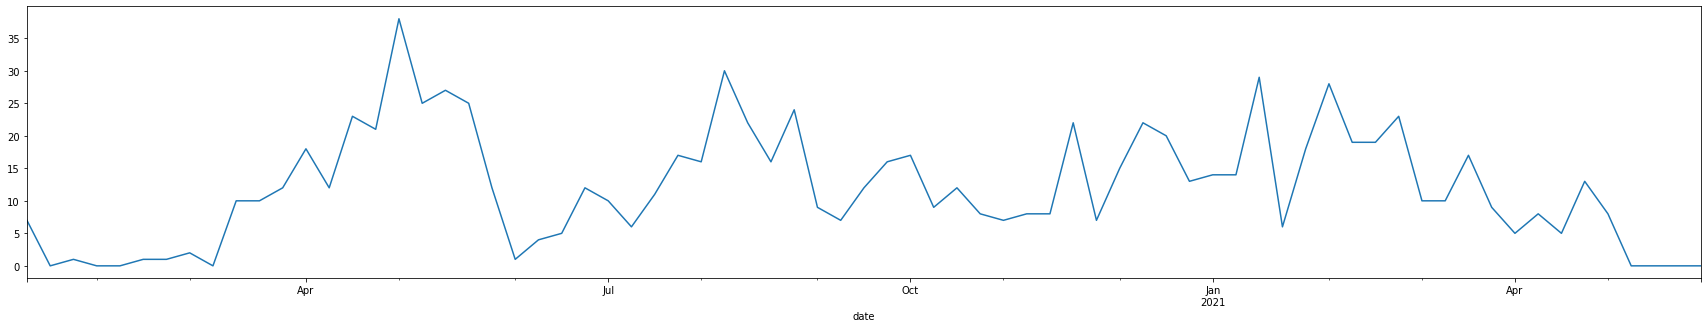

In [ ]:
ca.protest_class.resample('W').sum().plot(figsize=(30, 5))

### Pycaret on embedded california data

In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(data=ca, target='protest_class', data_split_shuffle=False, fold_strategy='timeseries', fold=3, remove_multicollinearity=True, fix_imbalance=True)

,Description,Value
0,session_id,7239
1,Target,protest_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28848, 223)"
5,Missing Values,False
6,Numeric Features,206
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='protest_class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('dummy', Dummify(target='protest_class')),
                ('fix_perfect', Remove_100(target='protest_class')),
       

In [ ]:
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9269,0.8080,0.3301,0.1936,0.2396,0.2041,0.2146,19.5500
nb,Naive Bayes,0.8289,0.7534,0.5585,0.1223,0.1993,0.1479,0.2012,0.4733
lda,Linear Discriminant Analysis,0.7859,0.7860,0.6109,0.1170,0.1927,0.1392,0.1982,0.3233
ada,Ada Boost Classifier,0.8928,0.7473,0.3523,0.1360,0.1898,0.1456,0.1674,3.8900
ridge,Ridge Classifier,0.7759,0.0000,0.5972,0.1162,0.1890,0.1354,0.1901,0.0967
lr,Logistic Regression,0.7372,0.7667,0.6384,0.1005,0.1683,0.1124,0.1735,3.5433
catboost,CatBoost Classifier,0.9577,0.8063,0.1058,0.3033,0.1548,0.1381,0.1596,11.6267
svm,SVM - Linear Kernel,0.5539,0.0000,0.7953,0.0913,0.1523,0.0946,0.1631,1.1100
lightgbm,Light Gradient Boosting Machine,0.9571,0.8116,0.0934,0.2570,0.1367,0.1199,0.1363,1.2667
xgboost,Extreme Gradient Boosting,0.9571,0.8116,0.0900,0.2535,0.1328,0.1160,0.1326,52.8767


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7239, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
prediction_holdout = predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7239, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.928,0.8253,0.3622,0.1664,0.228,0.1957,0.2121


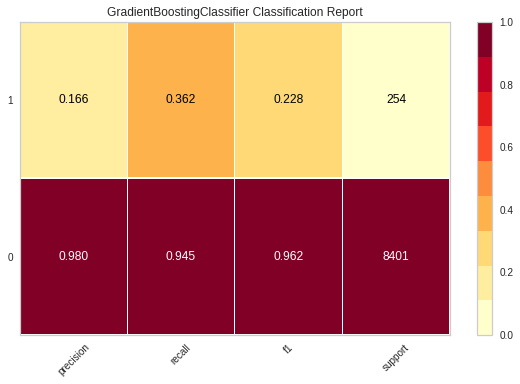

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot='class_report')

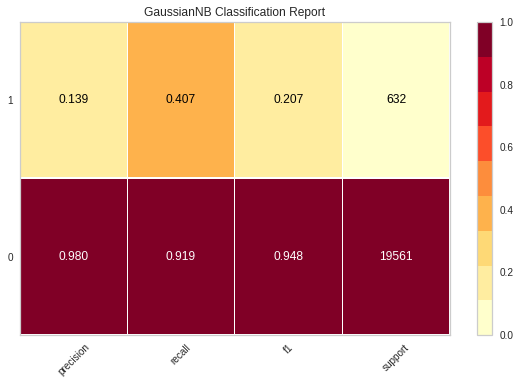

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot='class_report', use_train_data=True)

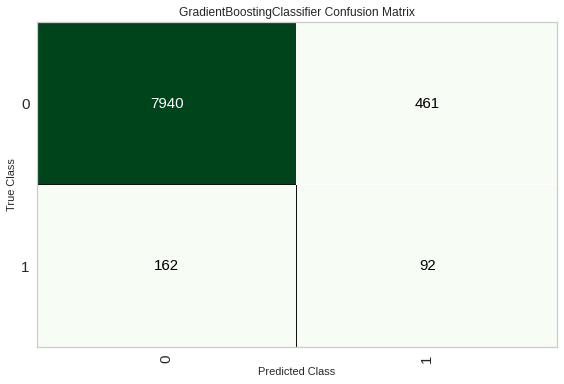

INFO:logs:Visual Rendered Successfully
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot='confusion_matrix')

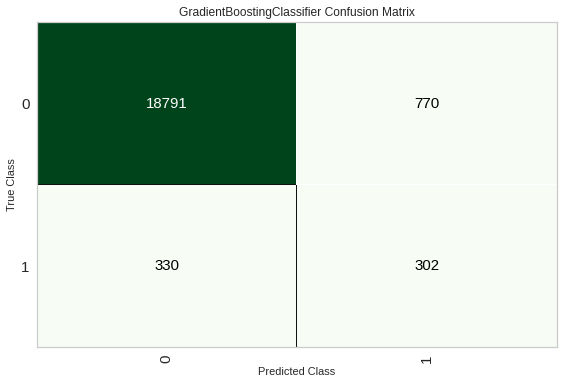

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(best, plot='confusion_matrix', use_train_data=True)

### Train_Test_Split


In [ ]:

## train test split

split = int(len(ca)*.7)
train = ca[:split]
test = ca[split:]

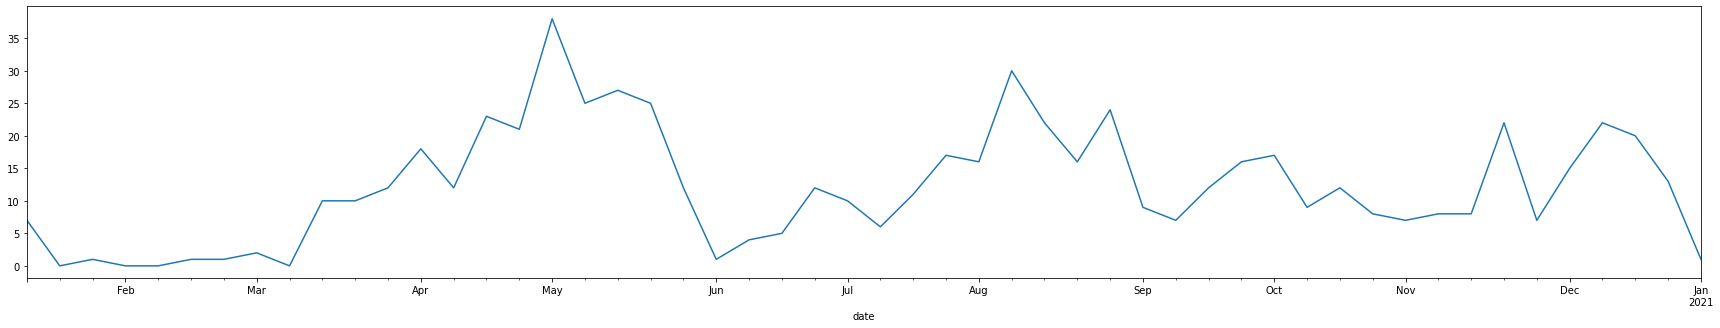

In [ ]:
train.protest_class.resample('W').sum().plot(figsize=(30, 5))

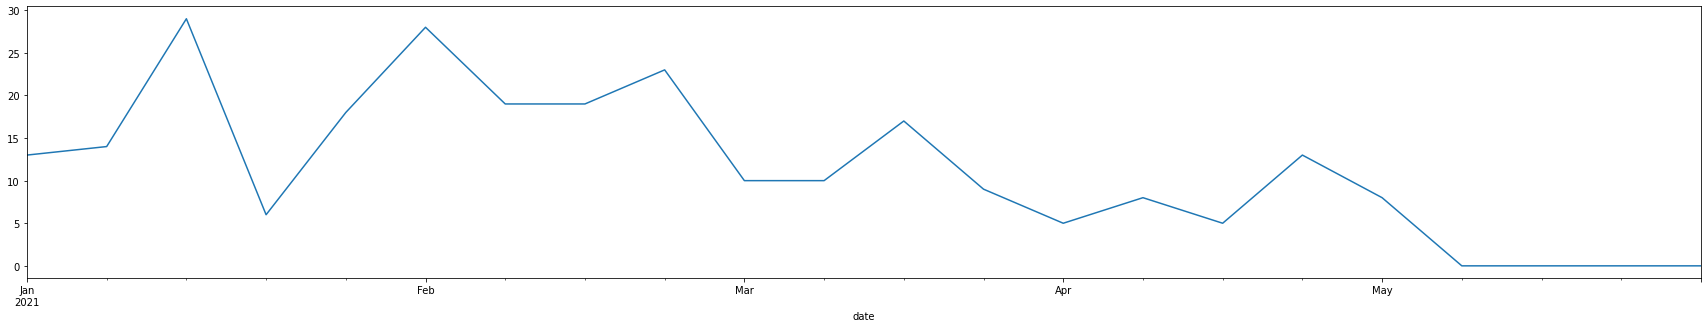

In [ ]:
test.protest_class.resample('W').sum().plot(figsize=(30, 5))

In [ ]:
x_train = train.drop('protest_class', axis=1)
y_train = train['protest_class']
x_test = test.drop('protest_class', axis=1)
y_test = test['protest_class']

# Keras Timeseries Alternative

https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/lstm_example_with_multivariate_time_series.ipynb

In [ ]:

#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Model
from keras.layers import Input, Dense
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K

In [ ]:
def generator(dataframe, target_name, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    
    data = dataframe.values
    data = data.astype(np.float32)
    target_indx = df.columns.get_loc(target_name)
    
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][target_indx]
        yield samples, targets

In [ ]:
#use previous 450 samples to predict next target ('pollution') samples
lookback = 10 # window used for prediction
delay = 1 # predict target one step ahead
batch_size = 256

train_gen = generator(dataframe = train, 
                      target_name = 'protest_class', 
                      lookback = lookback,
                      delay = 1,
                      min_index = 0,
                      max_index = int(train.shape[0]*0.8),
                      step = 1,
                      shuffle = True,
                      batch_size = batch_size)

In [ ]:
valid_gen = generator(dataframe = train, 
                      target_name = 'protest_class', 
                      lookback = lookback,
                      delay = 1,
                      min_index = int(train.shape[0]*0.8),
                      max_index = None,
                      step = 1,
                      shuffle = False,
                      batch_size = batch_size)


In [ ]:
test_gen = generator(dataframe = test, 
                     target_name = 'protest_class', 
                     lookback = lookback,
                     delay = 1,
                     min_index = 0,
                     max_index = None,
                     step = 1,
                     shuffle = False,
                     batch_size = batch_size)

In [ ]:
# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = int((train.shape[0]*.1 - lookback) // batch_size)
print('validation_steps = ', val_steps)
# This is how many steps to draw from `train_gen`
# in order to see the whole train set:
train_steps = int((train.shape[0]*.9 - lookback) // batch_size)
print('train_steps = ', train_steps)
# This is how many steps to draw from `train_gen`
# in order to see the whole train set:
test_steps = int((test.shape[0] - lookback) // batch_size)
print('test_steps = ', test_steps)

validation_steps =  7
train_steps =  70
test_steps =  33


In [ ]:

model = Sequential()
model.add(LSTM(50,
               activation='relu',
               return_sequences=True,
               stateful=False,
               input_shape=(None, train.shape[1])))
model.add(LSTM(50,
             activation='relu',
             return_sequences=False,
             stateful=False))

# model.add(CuDNNLSTM(64,
#                return_sequences=True,
#                stateful=False,
#                input_shape=(None, df_train_norm.shape[1])))
# model.add(CuDNNLSTM(32,
#                return_sequences=True,
#                stateful=False))
# model.add(CuDNNLSTM(16,
#              return_sequences=False,
#              stateful=False))
#model.add(Dropout(0.4))

model.add(Dense(1))

In [ ]:

#callbacks = [EarlyStopping(monitor='val_loss', min_delta = 0, patience=4),ModelCheckpoint(filepath='lstm_model.h5', monitor='val_loss', save_best_only=True)]

model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
history = model.fit_generator(train_gen,
                              steps_per_epoch=train_steps,
                              epochs=100,
                              shuffle=False,
                              validation_data=valid_gen,
                              validation_steps=val_steps)

Epoch 1/100
70/70 [==============================] - 4s 34ms/step - loss: 7940.3418 - accuracy: 0.5044 - val_loss: 2791.5312 - val_accuracy: 0.5290
Epoch 2/100
70/70 [==============================] - 2s 30ms/step - loss: 861.1737 - accuracy: 0.5219 - val_loss: 174.4178 - val_accuracy: 0.9459
Epoch 3/100
70/70 [==============================] - 2s 30ms/step - loss: 186.3850 - accuracy: 0.4962 - val_loss: 261.8863 - val_accuracy: 0.0977
Epoch 4/100
70/70 [==============================] - 2s 30ms/step - loss: 444.6701 - accuracy: 0.5364 - val_loss: 40.1124 - val_accuracy: 0.0698
Epoch 5/100
70/70 [==============================] - 2s 30ms/step - loss: 250.7250 - accuracy: 0.5220 - val_loss: 251.5723 - val_accuracy: 0.9989
Epoch 6/100
70/70 [==============================] - 2s 30ms/step - loss: 106.9773 - accuracy: 0.5743 - val_loss: 21.6722 - val_accuracy: 0.4068
Epoch 7/100
70/70 [==============================] - 2s 30ms/step - loss: 56.0293 - accuracy: 0.6034 - val_loss: 38.1303 - v

## Keras TimeSeries

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
past = 10
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 10

In [ ]:
start = past + future
end = start + train_split

In [ ]:
end

582527675

## AutoKeras

In [ ]:
predict_from = 1
predict_until = 10
lookback = 3
clf = ak.TimeseriesForecaster(
    lookback=lookback,
    predict_from=predict_from,
    predict_until=predict_until,
    max_trials=1,
    objective="val_loss",
    tuner='random'
)

In [ ]:
clf.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    batch_size=32,
    epochs=10,
)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
timeseries_bloc...|True              |?                 
timeseries_bloc...|lstm              |?                 
timeseries_bloc...|3                 |?                 
regression_head...|0.25              |?                 
optimizer         |adam              |?                 
learning_rate     |0.01              |?                 

Epoch 1/10


UnknownError: ignored

### Splitting data

In [ ]:
tweets = df.tweets
reddit = df.reddit
articles = df.articles

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.drop(['tweets', 'reddit', 'articles'], axis=1, inplace=True)

In [ ]:
float_cols = df.loc[:,'cases_avg': 'Rate_filled' ].columns

In [ ]:
df[float_cols] = df[float_cols].astype(float)

In [ ]:
df['tweets'] = tweets
df['reddit'] = reddit
df['articles'] = articles

In [ ]:
df.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507578 entries, 2020-01-07 to 2021-05-24
Data columns (total 177 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   index                                                   1507578 non-null  int64  
 1   state_fips                                              1507578 non-null  int64  
 2   fips                                                    1507578 non-null  int64  
 3   cases_avg                                               1507578 non-null  float64
 4   cases_avg_per_100k                                      1507578 non-null  float64
 5   deaths_avg                                              1507578 non-null  float64
 6   deaths_avg_per_100k                                     1507578 non-null  float64
 7   cases                                                   1507578 non-null  float64
 

In [ ]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28344 entries, 0 to 28343
Columns: 1506 entries, level_0 to State Senate Majority Political Affiliation_Unknown
dtypes: datetime64[ns](1), int64(8), object(159), uint8(1338)
memory usage: 72.5+ MB


In [ ]:
ca_embedded = pd.concat([ca, embed_dataframe], axis=1)

In [ ]:
ca_embedded.drop(['level_0', 'index', ''])

In [ ]:
ca_embedded

,level_0,date,index,state_fips,fips,cases_avg,cases_avg_per_100k,deaths_avg,deaths_avg_per_100k,cases,deaths,protest_count,Mobility_score,info_tweets,info_tweets_T,info_tweets_RE,info_tweets_RT,info_tweets_local,info_tweets_verified,info_tweets_unverified,info_fact_reliable,info_fact_unreliable,info_fact_unknown,info_fact_unreliable_fraction,info_fact_shadow,info_fact_missing,info_fact_science,info_fact_msm,info_fact_satire,info_fact_clickbait,info_fact_political,info_fact_fake,info_fact_conspiracy,info_iri,info_iri_T,info_iri_RE,info_iri_RT,info_dyn_iri,info_dyn_iri_RE,info_dyn_iri_RT,...,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,vector_mean
0,0,2020-01-07,0,6,6067,0.0,0.0,0.0,0.0,0.0,0.0,1.0,136.7974131911512,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.36,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,1.231438
1,68,2020-01-13,68,6,6011,230.7419877422944,18.706395215676263,3.7858451032788856,0.2655708953641225,230.49764601094287,0.0,0.0,100.0,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.36,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,0.212262
2,69,2020-01-13,69,6,6009,230.7419877422944,18.706395215676263,3.7858451032788856,0.2655708953641225,230.49764601094287,0.0,0.0,100.0,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.36,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,-0.011138
3,70,2020-01-13,70,6,6007,230.7419877422944,18.706395215676263,3.7858451032788856,0.2655708953641225,230.49764601094287,0.0,0.0,100.0,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.36,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.137723,-0.061685,-0.303051,0.128833,-0.094219,0.040824,-0.195429,-0.049658,-0.040108,0.185011,-0.095272,-0.246018,-0.036087,0.20382,-0.04092,0.332095
4,71,2020-01-13,71,6,6005,230.7419877422944,18.706395215676263,3.7858451032788856,0.2655708953641225,230.49764601094287,0.0,0.0,100.0,54427.0,12407.0,1770.0,40250.0,45957.0,2614.0,51813.0,9121.0,4737.0,5717.0,0.3418,4729.0,0.0,814.0,8307.0,7.0,32.0,3258.0,1032.0,408.0,0.1328,0.1283,0.0313,0.2012,0.3558,0.2103,0.36,...,-0.088038,-0.10036,0.143893,-0.127874,0.228115,-0.065458,-0.04873,-0.112722,0.051988,-0.14677,0.158444,0.006155,0.011074,0.074389,-0.291783,-0.076755,0.045046,-0.107444,-0.187255,-0.17597,0.093613,0.145429,-0.077466,0.230957,0.13

In [ ]:
ca_embedded.info(max_cols=2000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28344 entries, 0 to 28343
Data columns (total 232 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   level_0                                                 28344 non-null  int64         
 1   date                                                    28344 non-null  datetime64[ns]
 2   index                                                   28344 non-null  int64         
 3   state_fips                                              28344 non-null  int64         
 4   fips                                                    28344 non-null  int64         
 5   cases_avg                                               28344 non-null  object        
 6   cases_avg_per_100k                                      28344 non-null  object        
 7   deaths_avg                                              2

In [ ]:
ca_embedded.drop([''])

## Doc2Vec

In [ ]:
import gensim

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(df.tweets)]


In [ ]:
model = Doc2Vec(vector_size=64, min_count=1, epochs = 10)

In [ ]:
model.build_vocab(card_docs)

In [ ]:
model.train(card_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
card2vec = [model.infer_vector((df['tweets'][i].split(' '))) 
            for i in range(0,len(df['tweets']))]


In [ ]:
card2vec

NameError: ignored

## Getting Numeric Cols

In [ ]:
non_numeric_cols = ['reddit', 'tweets', 'articles', 'Governor Political Affiliation',
       'State Senate Majority Political Affiliation',
       'State House Majority Political Affiliation',
       'State Attorney General Political Affiliation',
       'State Insurance Commissioner Political Affiliation', 'date', 'state_fips', 'index', 'fips', 'ST_ABBR']
num_cols = df.drop(non_numeric_cols, axis=1).columns
df[num_cols] = df[num_cols].apply(pd.to_numeric)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
num_data = df[num_cols].drop('protest_count', axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
scaled_num_data = scaler.fit_transform(num_data)

In [ ]:
pca = PCA(n_components = .98)

In [ ]:
num_pca = pca.fit_transform(scaled_num_data)

In [ ]:
num_pca

array([[-3090.89342703],
       [-3090.88761036],
       [-3090.88692028],
       ...,
       [ 7921.11249062],
       [ 7921.11265941],
       [ 7921.11246187]])

In [ ]:
  cumm_var_explained[:20]

array([0.99964076, 0.99982177, 0.99990305, 0.99996136, 0.99998299,
       0.99998697, 0.99999035, 0.99999289, 0.9999942 , 0.99999522,
       0.99999604, 0.99999657, 0.999997  , 0.99999737, 0.99999764,
       0.99999782, 0.99999798, 0.99999813, 0.99999826, 0.9999984 ])

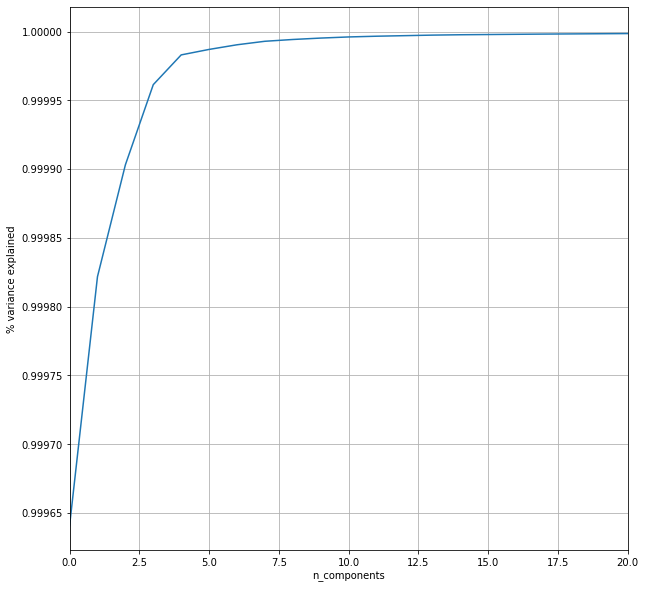

In [ ]:
percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.figure(figsize=(10,10))
plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")

plt.xlim((0,20))

plt.ylabel("% variance explained")
plt.show()

In [ ]:
cumm_var_explained[:53]

array([0.58266975, 0.98450041, 0.99301534, 0.99551208, 0.99694765,
       0.99749482, 0.99794297, 0.99836498, 0.99864558, 0.99886294,
       0.99906676, 0.99926186, 0.99942382, 0.99954483, 0.99962695,
       0.99969347, 0.99975025, 0.99979672, 0.99983611, 0.99986189,
       0.99988489, 0.99990527, 0.99992249, 0.99993854, 0.99995104,
       0.9999619 , 0.99997175, 0.99997817, 0.99998373, 0.99998792,
       0.99999153, 0.99999354, 0.99999495, 0.99999621, 0.99999735,
       0.9999984 , 0.99999914, 0.99999967, 0.99999972, 0.99999977,
       0.99999981, 0.99999985, 0.99999988, 0.9999999 , 0.99999991,
       0.99999992, 0.99999994, 0.99999994, 0.99999995, 0.99999996,
       0.99999997, 0.99999997, 0.99999998])

In [ ]:
vif = calc_vif(df[num_cols])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)


In [ ]:
vif.sort_values(by='VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


,variables,VIF
77,EP_UNEMP,inf
106,EPL_UNEMP,inf
99,EP_CROWD,inf
100,MP_CROWD,inf
101,EP_NOVEH,inf
102,MP_NOVEH,inf
103,EP_GROUPQ,inf
104,MP_GROUPQ,inf
105,EPL_POV,inf
107,EPL_PCI,inf


In [ ]:
df.isnull().sum()

date                                                    0
state_fips                                              0
fips                                                    0
index                                                   0
cases_avg                                             547
                                                     ... 
Governor Political Affiliation                          0
State Senate Majority Political Affiliation             0
State House Majority Political Affiliation              0
State Attorney General Political Affiliation            0
State Insurance Commissioner Political Affiliation      0
Length: 169, dtype: int64

In [ ]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28344 entries, 0 to 1519939
Data columns (total 169 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                28344 non-null  object 
 1   state_fips                                          28344 non-null  object 
 2   fips                                                28344 non-null  object 
 3   index                                               28344 non-null  object 
 4   cases_avg                                           28344 non-null  float64
 5   cases_avg_per_100k                                  28344 non-null  float64
 6   deaths_avg                                          28344 non-null  float64
 7   deaths_avg_per_100k                                 28344 non-null  float64
 8   cases                                               28344 non-null  float

# Keras Time Series Tutorial

In [ ]:
from tensorflow import keras

In [ ]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
train_split

300693

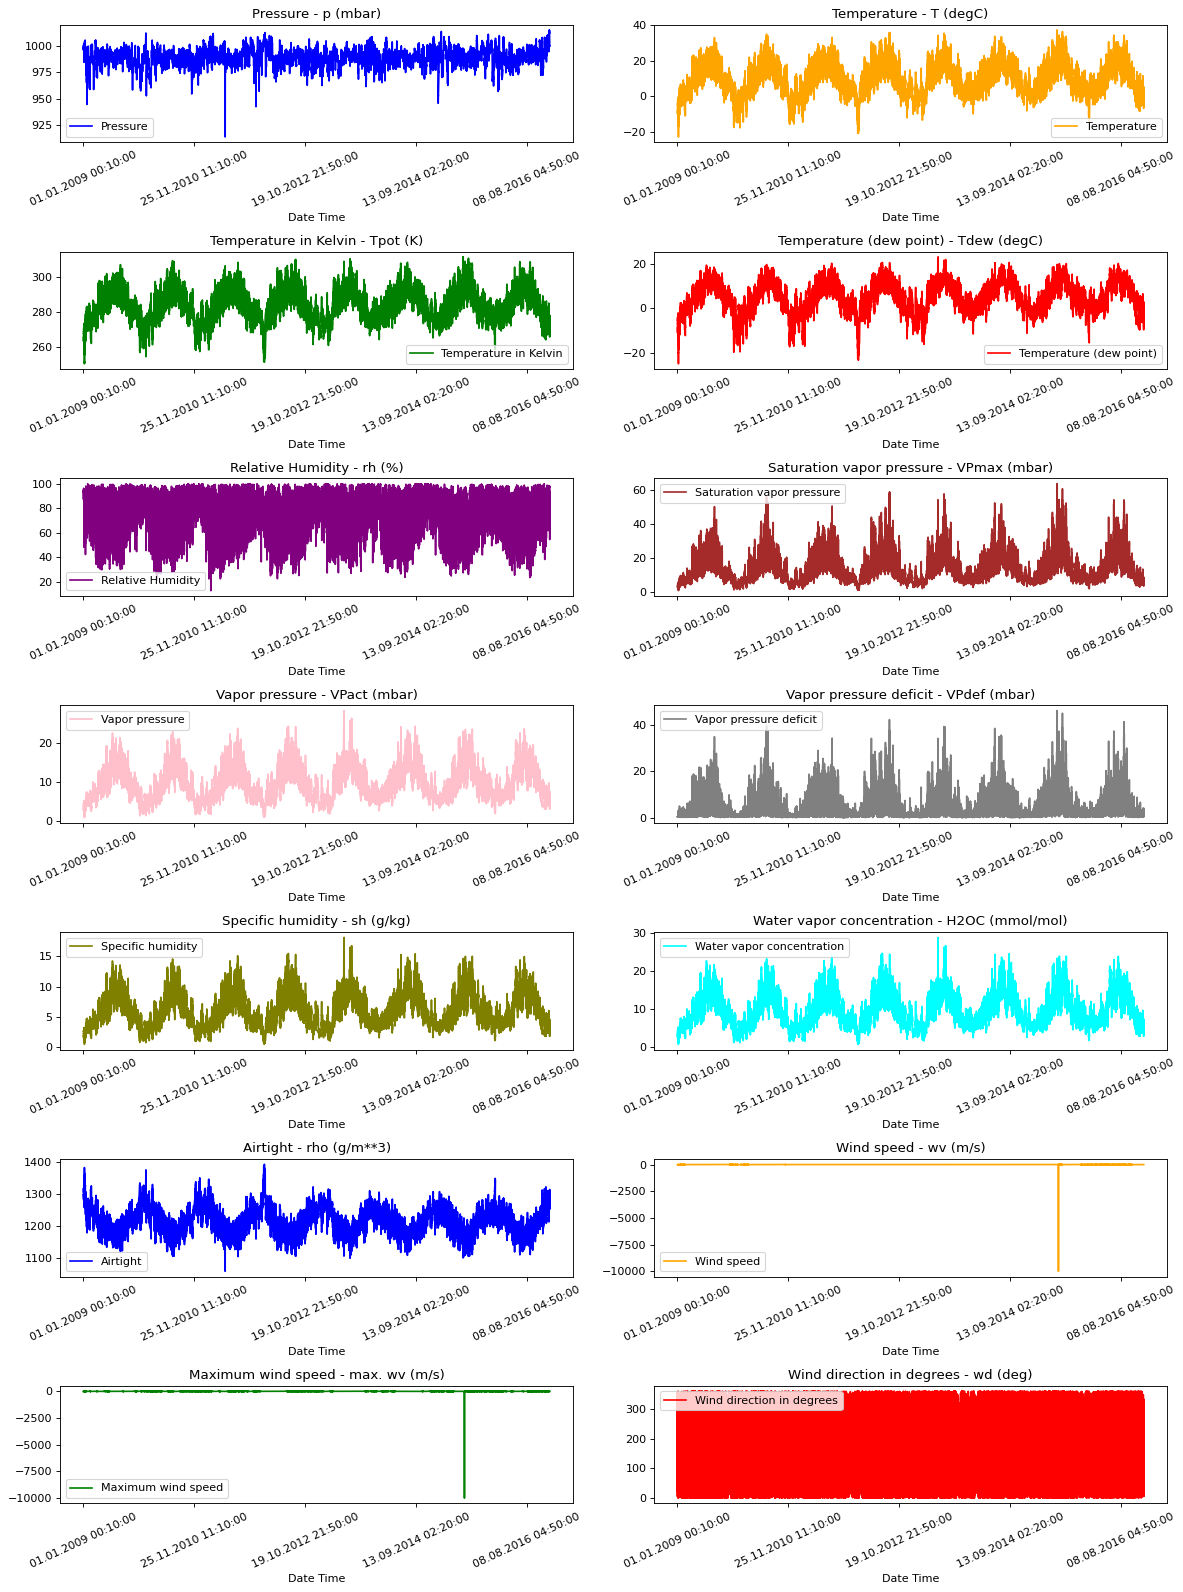

In [ ]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = "Date Time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

In [ ]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [ ]:
df.shape

(420551, 15)

In [ ]:
display(train_data.shape)
val_data.shape

(300693, 7)

(119858, 7)

In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [ ]:
start

792

In [ ]:
end

301485

In [ ]:
x_train.shape

(300693, 7)

In [ ]:
x_train

array([[ 0.95545114, -2.00002   , -1.31978162, ..., -1.50092673,
         2.23765845, -0.73299722],
       [ 0.96152792, -2.04518494, -1.33280552, ..., -1.51952063,
         2.28783773, -0.93600233],
       [ 0.9566665 , -2.0567657 , -1.3354103 , ..., -1.52323941,
         2.29860792, -1.28307559],
       ...,
       [-0.11163086,  0.90211719,  0.78097422, ...,  1.39228456,
        -0.92045437, -0.79193419],
       [-0.11770764,  0.89632681,  0.77185748, ...,  1.38856578,
        -0.91653794, -0.79193419],
       [-0.11041551,  0.8639007 ,  0.72757621, ...,  1.39600334,
        -0.88740948, -0.8312255 ]])

In [ ]:
y_train

,1
792,-2.745821
793,-2.701814
794,-2.641594
795,-2.597587
796,-2.509573
...,...
301480,0.272124
301481,0.210746
301482,0.264018
301483,0.305708


In [ ]:
sequence_length

120

In [ ]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:
dataset_train

<BatchDataset shapes: ((None, None, 7), (None, 1)), types: (tf.float64, tf.float64)>

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


Input shape: (256, 120, 7)
Target shape: (256, 1)


In [ ]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 7)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5120      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
 266/1172 [=====>........................] - ETA: 51s - loss: 0.3305

KeyboardInterrupt: ignored